# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data Collection & Analysis

In [2]:
# loading the data from csv file to Pandas DataFrame

customer_data= pd.read_csv('/content/Mall_Customers.csv')

In [3]:
# first 5 rows of the dataset
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# number of rows and columns in the dataset
customer_data.shape

(200, 5)

In [5]:
# getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### No missing values in the dataset

### Choosing the Annaul Income & Spending Score features for the clustering as other features are not that important

In [6]:
X = customer_data.iloc[:,[3,4]].values

In [7]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# Selecting the number of clusters

### WCSS -> Within Clusters Sum of Squares

In [8]:
# finding wcss value for different number of clusters

wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [9]:
wcss

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785,
 24766.471609793436,
 23103.122085983905]

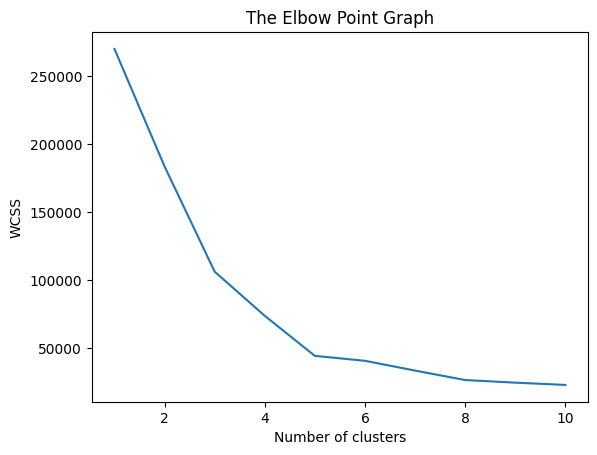

In [23]:
# plot elbow curve

plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Optimum Number of Clusters = 5

# Training the K-Means Clustering Model

In [13]:
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=42)

# return labels for each data point based on their cluster
y_labels = kmeans.fit_predict(X)
y_labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

# Visualizing all the Clusters

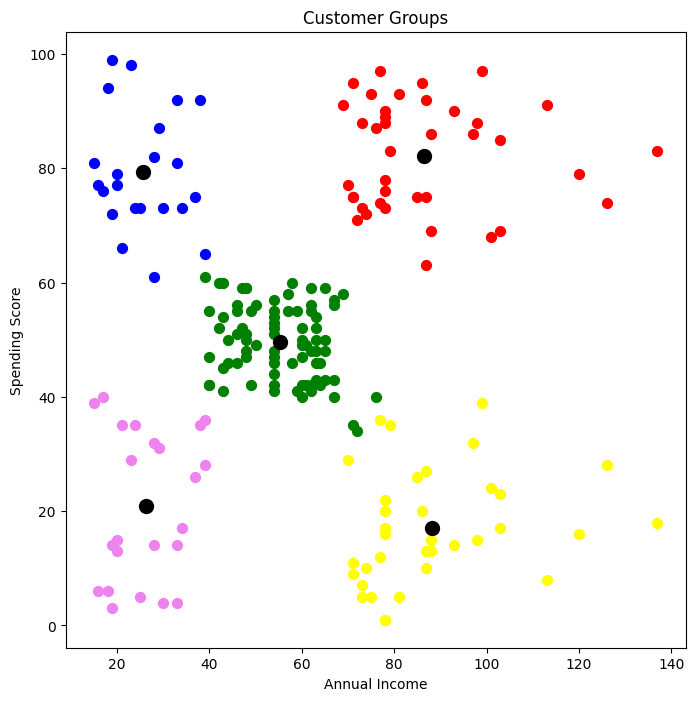

In [16]:
# plot all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X[y_labels==0,0], X[y_labels==0,1], s=50, c = 'green', label='Cluster 1')
plt.scatter(X[y_labels==1,0], X[y_labels==1,1], s=50, c = 'red', label='Cluster 2')
plt.scatter(X[y_labels==2,0], X[y_labels==2,1], s=50, c = 'blue', label='Cluster 3')
plt.scatter(X[y_labels==3,0], X[y_labels==3,1], s=50, c = 'yellow', label='Cluster 4')
plt.scatter(X[y_labels==4,0], X[y_labels==4,1], s=50, c = 'violet', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label= "Centroids")

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Evaluating clusters using Silhouette Score

In [20]:
silhouette_coefficients=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k, init = 'k-means++')
  kmeans.fit(X)
  score=silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

In [21]:
silhouette_coefficients

[np.float64(0.2918426367691145),
 np.float64(0.46761358158775435),
 np.float64(0.4937945814354117),
 np.float64(0.5532176107575425),
 np.float64(0.5423120971494979),
 np.float64(0.4553566374071049),
 np.float64(0.4587710519424282),
 np.float64(0.4229135447518961),
 np.float64(0.44156027619254706)]

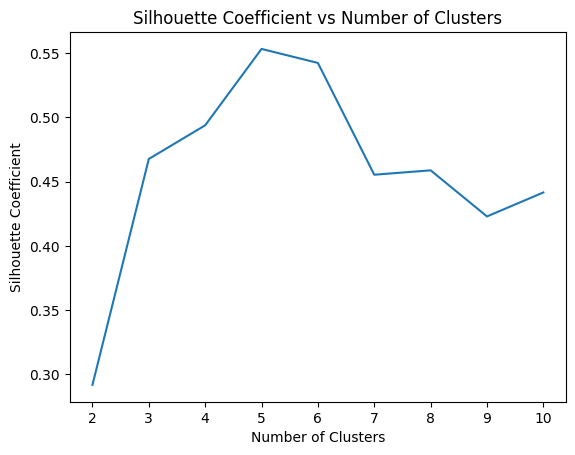

In [22]:
plt.plot(range(2,11), silhouette_coefficients)
plt.title("Silhouette Coefficient vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()